<a href="https://colab.research.google.com/github/fatisa2000/ml_project/blob/main/Image_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align=center>

<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#4d7db8>
Sharif University of Technology - Department of Electrical Engineering
</font>
<p></p>
<font color=#4d7db8>
Introduction To Machine Learning - Dr. Sajjad Amini
</font>
<br/>
<br/>
Spring Semester 1401-02

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Project - 3rd Phase
<br />
Image Denoising using Autoencoder and PCA
			</font>
    <br/>
<font size=4>
			<br/><br/>
Due on Tir 10th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=green>
Should you have any questions concerning the project, please feel free to ask via Telegram.
     </font>
</font>
                <br/>
    </div>

# Personal Info
<hr/>
    <div class="column" align=center>
    <font size=4>
        <div class="column">
        <br />
            student_number = Stu. No. 1
            <br />
            Name = ...   
            <br />
            Last_Name = ...
        </div>
        <div class="column">
        <br />
            student_number = Stu. No. 2
            <br />
            Name = ...   
            <br />
            Last_Name = ...
        </div>
    </font>
    </div>


name:fateme   
last name:salehin      
student number:97101961     
i did project alone  

**1**. Download the MNIST dataset and create a dataloader that adds gaussian noise to the input images.
2. Design and train an AutoEncoder on the MNIST dataset to denoise the noisy images.
3. Visualize original images, their corresponding noisy images and their reconstructed versions side by side.
4. Repeat the previous steps using PCA algorithm.

# Import Necessary Libraries

In [7]:
!pip install tensorflow numpy
import tensorflow as tf
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load Dataset and Prepare It

In [21]:
torch.manual_seed(42)
transform = transforms.Compose([transforms.ToTensor(),])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)
batch_size = 16
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [22]:
def add_gaussian_noise(images, mean=0.0, std=0.1):
    noisy_images = images + torch.randn_like(images) * std + mean
    return torch.clamp(noisy_images, 0.0, 1.0)


# Define Your Model
torch neural network model

In [23]:
class AutoEncoder(nn.Module):
    def __init__(self, latent_dim):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim),
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

latent_dim = 32
learning_rate = 0.001
num_epochs = 10

model = AutoEncoder(latent_dim).to(device)

# Fit The Model
Also Define optimizer, Criterion and other parameters

In [24]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    train_loss = 0.0

    for images, _ in train_loader:
        images = images.view(images.size(0), -1)
        noisy_images = add_gaussian_noise(images).to(device)
        images = images.to(device)

        optimizer.zero_grad()

        outputs = model(noisy_images)
        loss = criterion(outputs, images)

        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)

    train_loss /= len(train_loader.dataset)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}")

Epoch [1/10], Loss: 0.0232
Epoch [2/10], Loss: 0.0113
Epoch [3/10], Loss: 0.0093
Epoch [4/10], Loss: 0.0085
Epoch [5/10], Loss: 0.0080
Epoch [6/10], Loss: 0.0078
Epoch [7/10], Loss: 0.0076
Epoch [8/10], Loss: 0.0074
Epoch [9/10], Loss: 0.0073
Epoch [10/10], Loss: 0.0072


# Plot The Results

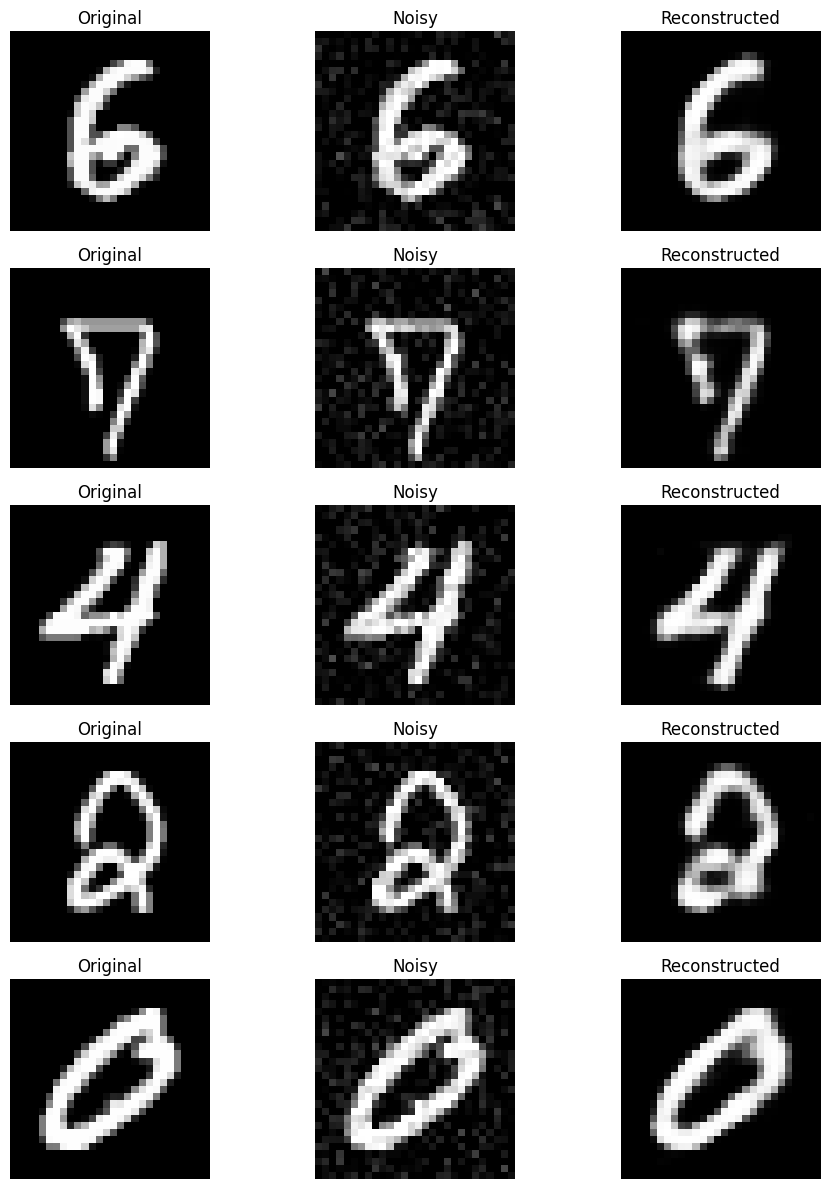

In [26]:
indices = torch.randint(0, len(test_dataset), (5,))
samples = [test_dataset[i][0] for i in indices]
noisy_samples = add_gaussian_noise(torch.stack(samples)).to(device)
reconstructed_samples = model(noisy_samples.view(noisy_samples.size(0), -1)).detach().cpu()
reconstructed_samples = reconstructed_samples.view(-1, 1, 28, 28)

fig, axes = plt.subplots(len(samples), 3, figsize=(10, 12))

for i, sample in enumerate(samples):
    axes[i, 0].imshow(sample.squeeze(), cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Original')

    axes[i, 1].imshow(noisy_samples[i].squeeze(), cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Noisy')

    axes[i, 2].imshow(reconstructed_samples[i].squeeze(), cmap='gray')
    axes[i, 2].axis('off')
    axes[i, 2].set_title('Reconstructed')

plt.tight_layout()
plt.show()

# PCA

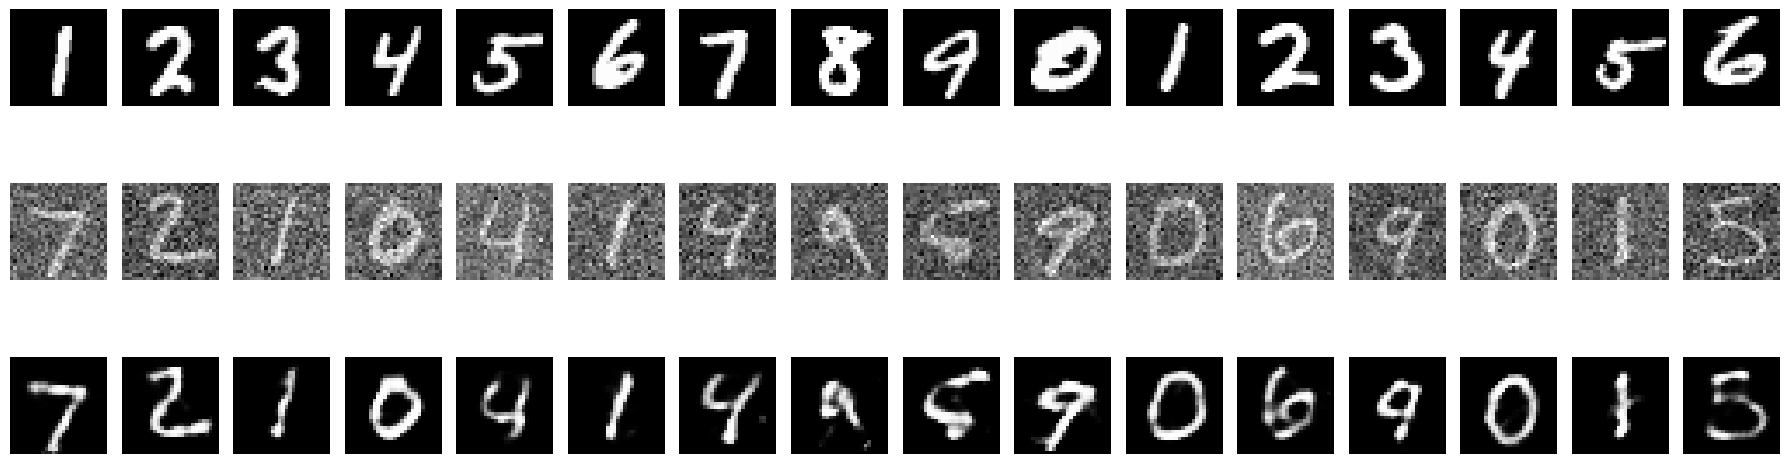

In [31]:
pca = PCA(n_components=2)
original_images = []
noisy_images = []
reconstructed_images = []

for data in test_loader:
    images, _ = data
    images = images.view(images.size(0), -1)
    noisy_images_batch = images + torch.randn_like(images) * 0.3  # Add Gaussian noise


    outputs = model(noisy_images_batch)

    original_images.extend(images.detach().numpy())
    noisy_images.extend(noisy_images_batch.detach().numpy())
    reconstructed_images.extend(outputs.detach().numpy())

original_images = np.array(original_images)
noisy_images = np.array(noisy_images)
reconstructed_images = np.array(reconstructed_images)


encoded_original = model.encoder(torch.from_numpy(original_images)).detach().numpy()
encoded_noisy = model.encoder(torch.from_numpy(noisy_images)).detach().numpy()
encoded_reconstructed = model.encoder(torch.from_numpy(reconstructed_images)).detach().numpy()

pca.fit(encoded_original)
pca_original = pca.transform(encoded_original)
pca_noisy = pca.transform(encoded_noisy)
pca_reconstructed = pca.transform(encoded_reconstructed)

plt.figure(figsize=(18, 6))

for i in range(len(images)):
    plt.subplot(3, len(images), i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(3, len(images), i + 1 + len(images))
    plt.imshow(noisy_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(3, len(images), i + 1 + 2 * len(images))
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()
